In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/tmp/data/train.csv',index_col=['PassengerId'])

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
df.loc[2]

Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                        38
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                                                     C85
Embarked                                                    C
Name: 2, dtype: object

In [5]:
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
def adding_personal_title(dataframe):
    import matplotlib 
    l = pd.Series(dataframe[['Name']].values.flatten()).str.findall('[\w.]+\.')
    titles = pd.Series(list(matplotlib.cbook.flatten(l))).str.replace('\.','')
    titles.index = np.arange(dataframe.index[0], len(titles)+dataframe.index[0])
    dataframe['PersonalTitle'] = titles
#traverse (minus one!!! invertebable)
def get_personal_title(x):
    return {
        'Miss': 1,
        'Mr': 2,
        'Don': 3,
        'Master': 4,
        'Rev': 5,
        'Capt': 6,
        'Col': 7,
        'Countess': 8,
        'Dr': 9,
        'Jonkheer': 10,
        'Lady': 11,
        'Major': 12,
        'Ms': 13,
        'Sir': 14,
        'Mlle': 15,
        'Mme': 16,
        'L': 17,
        'Mrs': 18,
        'Dona': 19
    }.get(x, 20)
    



def personal_title_to_number(dataframe):
    dataframe['PersonalTitleNumber'] = dataframe['PersonalTitle'].apply(lambda x: get_personal_title(x))
   

In [7]:
adding_personal_title(df)
df = pd.get_dummies(df, columns=["PersonalTitle"])



In [8]:
#df.groupby("PersonalTitle").all()


In [9]:
import matplotlib.pyplot as plt
df[['Age']].plot.hist()


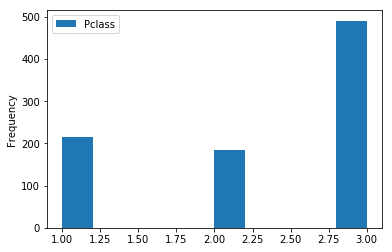

In [10]:
df[['Pclass']].plot.hist()


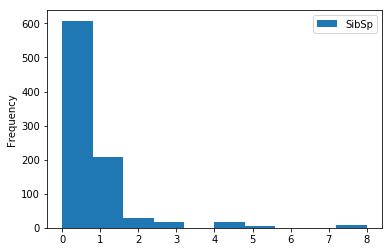

In [11]:
df[['SibSp']].plot.hist()


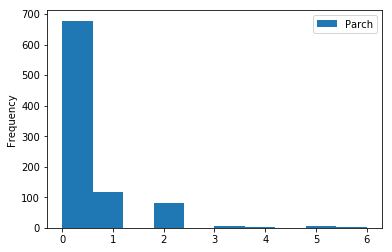

In [12]:
df[['Parch']].plot.hist()


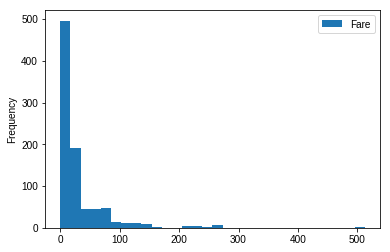

In [13]:
df[['Fare']].plot.hist(bins = 30)
#check 
import seaborn as sns


In [14]:
#cleaning
def cleaning_age(dataframe):
    mask = dataframe.Age.isnull()
    column_name = 'Age'
    mean_age = dataframe.Age.mean()
    dataframe.loc[mask, column_name] = mean_age
def cleaning_fare(dataframe):
    mask = dataframe.Fare.isnull()
    column_name = 'Fare'
    mean_fare = dataframe.Fare.mean()
    dataframe.loc[mask, column_name] = mean_fare

cleaning_age(df)
cleaning_fare(df)

In [15]:
#featuring 
#sex
def sex_to_number(dataframe):
    mask = dataframe.Sex == "male"
    column_name = 'Sex'
    dataframe.loc[mask, column_name] = 0
    mask = dataframe.Sex == "female"
    column_name = 'Sex'
    dataframe.loc[mask, column_name] = 1

def embarked_to_number(dataframe):
    mask = dataframe.Embarked == "S"
    column_name = 'Embarked'
    dataframe.loc[mask, column_name] = 0
    mask = dataframe.Embarked == "C"
    column_name = 'Embarked'
    dataframe.loc[mask, column_name] = 1
    mask = dataframe.Embarked == "Q"
    column_name = 'Embarked'
    dataframe.loc[mask, column_name] = 2
    mask = dataframe.Embarked.isnull()
    column_name = 'Embarked'
    dataframe.loc[mask, column_name] = -1
    
sex_to_number(df)
embarked_to_number(df)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,PersonalTitle_Major,PersonalTitle_Master,PersonalTitle_Miss,PersonalTitle_Mlle,PersonalTitle_Mme,PersonalTitle_Mr,PersonalTitle_Mrs,PersonalTitle_Ms,PersonalTitle_Rev,PersonalTitle_Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,1,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,0,0,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,...,0,0,0,0,0,1,0,0,0,0
6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,...,0,0,0,0,0,1,0,0,0,0
7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,...,0,0,0,0,0,1,0,0,0,0
8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,...,0,1,0,0,0,0,0,0,0,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,...,0,0,0,0,0,0,1,0,0,0


In [16]:
X = df[['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked','PersonalTitle_Mr','PersonalTitle_Ms','PersonalTitle_Miss','PersonalTitle_Mrs']]
y = df['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PersonalTitle_Capt,PersonalTitle_Col,PersonalTitle_Countess,...,PersonalTitle_Master,PersonalTitle_Miss,PersonalTitle_Mlle,PersonalTitle_Mme,PersonalTitle_Mr,PersonalTitle_Mrs,PersonalTitle_Ms,PersonalTitle_Rev,PersonalTitle_Sir,PersonalTitle_Dona
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,1,26.000000,0,0,7.9250,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,0,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,3,0,29.699118,0,0,8.4583,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1,0,54.000000,0,0,51.8625,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,3,0,2.000000,3,1,21.0750,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,3,1,27.000000,0,2,11.1333,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
#Check is clean
pd.isnull(X).any()

Pclass                    False
Sex                       False
Age                       False
SibSp                     False
Parch                     False
Fare                      False
Embarked                  False
PersonalTitle_Capt        False
PersonalTitle_Col         False
PersonalTitle_Countess    False
PersonalTitle_Don         False
PersonalTitle_Dr          False
PersonalTitle_Jonkheer    False
PersonalTitle_L           False
PersonalTitle_Lady        False
PersonalTitle_Major       False
PersonalTitle_Master      False
PersonalTitle_Miss        False
PersonalTitle_Mlle        False
PersonalTitle_Mme         False
PersonalTitle_Mr          False
PersonalTitle_Mrs         False
PersonalTitle_Ms          False
PersonalTitle_Rev         False
PersonalTitle_Sir         False
PersonalTitle_Dona        False
dtype: bool

In [18]:
#fit model two
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Train the model using the training sets and check score
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
#test the model
test = pd.read_csv('/tmp/data/test.csv',index_col=['PassengerId'])




cleaning_age(test)
cleaning_fare(test)

sex_to_number(test)
embarked_to_number(test)

adding_personal_title(test)
test = pd.get_dummies(test, columns=["PersonalTitle"])

test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PersonalTitle_Col,PersonalTitle_Dona,PersonalTitle_Dr,PersonalTitle_Master,PersonalTitle_Miss,PersonalTitle_Mr,PersonalTitle_Mrs,PersonalTitle_Ms,PersonalTitle_Rev
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,2,0,0,0,0,0,1,0,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,0,0,0,0,0,0,0,1,0,0
894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,2,0,0,0,0,0,1,0,0,0
895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,0,0,0,0,0,0,1,0,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,0,0,0,0,0,0,0,1,0,0
897,3,"Svensson, Mr. Johan Cervin",0,14.00000,0,0,7538,9.2250,NaN,0,0,0,0,0,0,1,0,0,0
898,3,"Connolly, Miss. Kate",1,30.00000,0,0,330972,7.6292,NaN,2,0,0,0,0,1,0,0,0,0
899,2,"Caldwell, Mr. Albert Francis",0,26.00000,1,1,248738,29.0000,NaN,0,0,0,0,0,0,1,0,0,0
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.00000,0,0,2657,7.2292,NaN,1,0,0,0,0,0,0,1,0,0


In [20]:
#test with linear regresion
X_test = test.drop(['Name','Ticket','Cabin'],axis=1)


In [21]:
list(X_test.columns.values)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'PersonalTitle_Col',
 'PersonalTitle_Dona',
 'PersonalTitle_Dr',
 'PersonalTitle_Master',
 'PersonalTitle_Miss',
 'PersonalTitle_Mr',
 'PersonalTitle_Mrs',
 'PersonalTitle_Ms',
 'PersonalTitle_Rev']

In [22]:
list(X.columns.values)

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'PersonalTitle_Capt',
 'PersonalTitle_Col',
 'PersonalTitle_Countess',
 'PersonalTitle_Don',
 'PersonalTitle_Dr',
 'PersonalTitle_Jonkheer',
 'PersonalTitle_L',
 'PersonalTitle_Lady',
 'PersonalTitle_Major',
 'PersonalTitle_Master',
 'PersonalTitle_Miss',
 'PersonalTitle_Mlle',
 'PersonalTitle_Mme',
 'PersonalTitle_Mr',
 'PersonalTitle_Mrs',
 'PersonalTitle_Ms',
 'PersonalTitle_Rev',
 'PersonalTitle_Sir',
 'PersonalTitle_Dona']

In [23]:
cols = np.unique(np.concatenate([X.columns.values,X_test.columns.values]))

In [24]:
pd.isnull(X_test).any() #and gets False

Pclass                  False
Sex                     False
Age                     False
SibSp                   False
Parch                   False
Fare                    False
Embarked                False
PersonalTitle_Col       False
PersonalTitle_Dona      False
PersonalTitle_Dr        False
PersonalTitle_Master    False
PersonalTitle_Miss      False
PersonalTitle_Mr        False
PersonalTitle_Mrs       False
PersonalTitle_Ms        False
PersonalTitle_Rev       False
dtype: bool

In [25]:
for c in cols:
    if c not in X_test:
        print("I'm NOT there _____"+c)
        X_test
        X_test[c] = pd.Series(0, index=X_test.index)
    else:
        print("I'm  there _____"+c)

I'm  there _____Age
I'm  there _____Embarked
I'm  there _____Fare
I'm  there _____Parch
I'm  there _____Pclass
I'm NOT there _____PersonalTitle_Capt
I'm  there _____PersonalTitle_Col
I'm NOT there _____PersonalTitle_Countess
I'm NOT there _____PersonalTitle_Don
I'm  there _____PersonalTitle_Dona
I'm  there _____PersonalTitle_Dr
I'm NOT there _____PersonalTitle_Jonkheer
I'm NOT there _____PersonalTitle_L
I'm NOT there _____PersonalTitle_Lady
I'm NOT there _____PersonalTitle_Major
I'm  there _____PersonalTitle_Master
I'm  there _____PersonalTitle_Miss
I'm NOT there _____PersonalTitle_Mlle
I'm NOT there _____PersonalTitle_Mme
I'm  there _____PersonalTitle_Mr
I'm  there _____PersonalTitle_Mrs
I'm  there _____PersonalTitle_Ms
I'm  there _____PersonalTitle_Rev
I'm NOT there _____PersonalTitle_Sir
I'm  there _____Sex
I'm  there _____SibSp


In [26]:
for c in cols:
    if c not in X:
        print("I'm NOT there _____"+c)
    else:
        print("I'm  there _____"+c)

I'm  there _____Age
I'm  there _____Embarked
I'm  there _____Fare
I'm  there _____Parch
I'm  there _____Pclass
I'm  there _____PersonalTitle_Capt
I'm  there _____PersonalTitle_Col
I'm  there _____PersonalTitle_Countess
I'm  there _____PersonalTitle_Don
I'm  there _____PersonalTitle_Dona
I'm  there _____PersonalTitle_Dr
I'm  there _____PersonalTitle_Jonkheer
I'm  there _____PersonalTitle_L
I'm  there _____PersonalTitle_Lady
I'm  there _____PersonalTitle_Major
I'm  there _____PersonalTitle_Master
I'm  there _____PersonalTitle_Miss
I'm  there _____PersonalTitle_Mlle
I'm  there _____PersonalTitle_Mme
I'm  there _____PersonalTitle_Mr
I'm  there _____PersonalTitle_Mrs
I'm  there _____PersonalTitle_Ms
I'm  there _____PersonalTitle_Rev
I'm  there _____PersonalTitle_Sir
I'm  there _____Sex
I'm  there _____SibSp


In [27]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PersonalTitle_Col,PersonalTitle_Dona,PersonalTitle_Dr,...,PersonalTitle_Capt,PersonalTitle_Countess,PersonalTitle_Don,PersonalTitle_Jonkheer,PersonalTitle_L,PersonalTitle_Lady,PersonalTitle_Major,PersonalTitle_Mlle,PersonalTitle_Mme,PersonalTitle_Sir
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,0,34.50000,0,0,7.8292,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,3,1,47.00000,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,2,0,62.00000,0,0,9.6875,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,3,0,27.00000,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,3,1,22.00000,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,3,0,14.00000,0,0,9.2250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
898,3,1,30.00000,0,0,7.6292,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
899,2,0,26.00000,1,1,29.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
900,3,1,18.00000,0,0,7.2292,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,

In [29]:
result = pd.DataFrame(data={'PassengerId':X_test.index,'Survived':y_pred})

In [30]:
result.to_csv('/tmp/data/pred.csv',header=True,index=False)